In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import pickle

In [2]:
img_array = cv2.imread("Test_Dataset/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

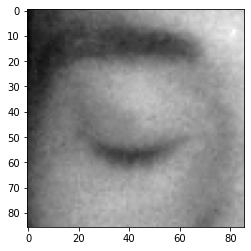

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(86, 86)

In [7]:
training_Data = []
classes = ['closed_eyes','opened_eyes']
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
              #if we don't use cvtColor for each image , the images will not take same size so reshape function will not work
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [10]:
import random
random.shuffle(training_Data)

X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,img_size,img_size,3)



In [11]:
X.shape


(5000, 224, 224, 3)

In [12]:
X = X/255.0;


In [13]:
Y=np.array(y)

In [14]:
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

from tensorflow import keras
from tensorflow.keras import layers 

In [15]:
pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in= open("y.pickle","rb")
y = pickle.load(pickle_in)

model = tf.keras.applications.mobilenet.MobileNet()


In [16]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [17]:
base_input = model.layers[0].input

In [18]:
base_output = model.layers[-4].output

In [19]:
Flat_layer = layers.Flatten()(base_output)

In [20]:
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

In [21]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [22]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [23]:
new_model.compile(loss="binary_crossentropy",optimizer= "adam",metrics=["accuracy"])

In [24]:
new_model.fit(X,Y, epochs = 4 ,validation_split = 0.1)

141/141 [==============================] - 951s 7s/step - loss: 1.6350 - accuracy: 0.8838 - val_loss: 5.4872 - val_accuracy: 0.6380


In [25]:
new_model.save('my_model.h5')